## Checking for stationarity

### 1. Checking the rolling mean

- If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not to be stationary.

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#### Airline dataset

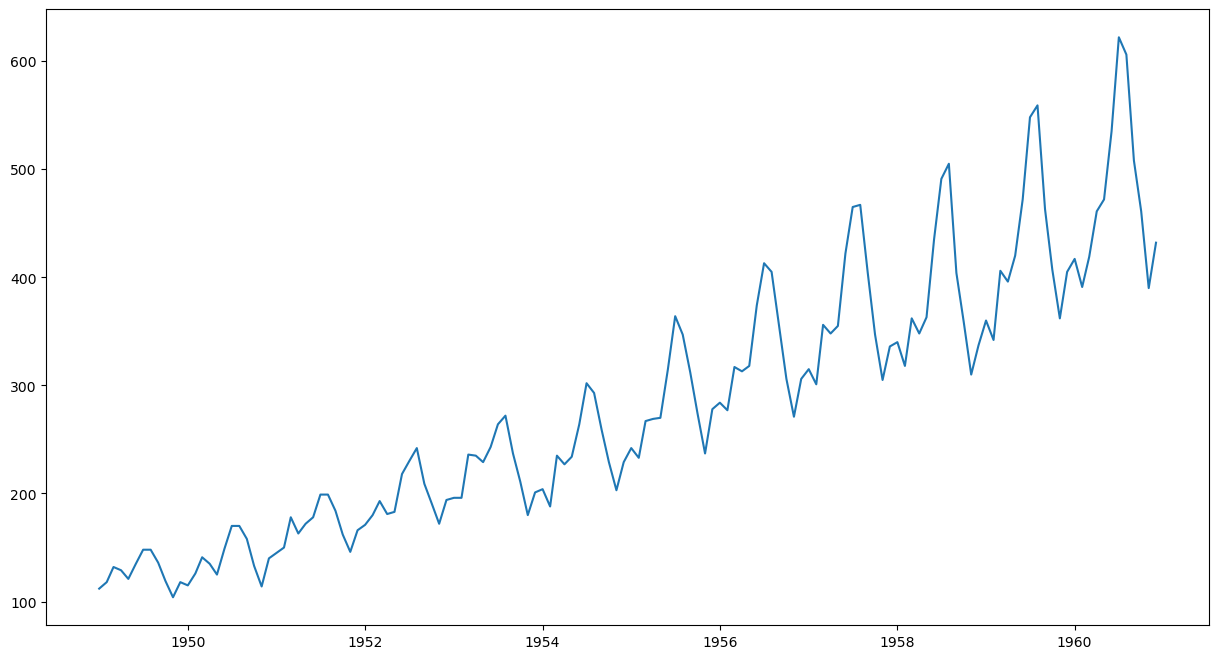

In [2]:
# import Airline datasets

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,index_col=0, header = 0, parse_dates=['Month'])

# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot(df)

#### Moving average
- The moving average method calculates the average of a set of values over a specified window size. This method is useful for removing high-frequency noise from the data but may not be effective for removing low-frequency noise.

- The window size determines how many data points are included in the calculation. Moving averages are useful for identifying trends in data sets as they smooth out fluctuations in the data.

In [23]:
# rolling mean for passengers data

df['Passengers_rolling_mean'] = df['Passengers'].rolling(12).mean()
df['Passengers_rolling_std'] = df['Passengers'].rolling(12).std()

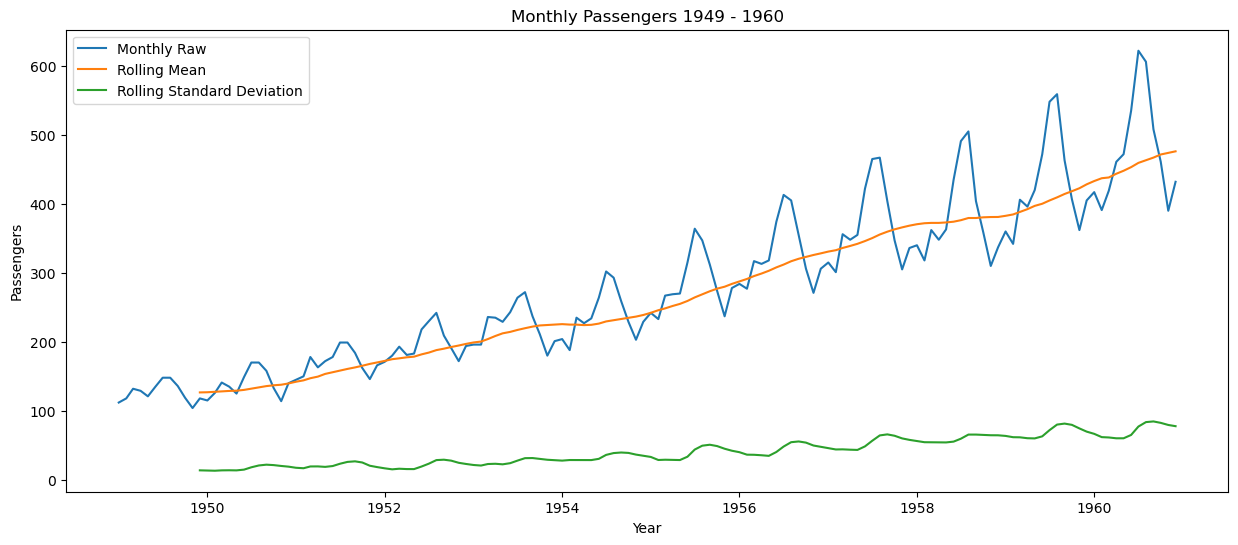

In [24]:
# check the stationary using moving average

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Monthly Passengers 1949 - 1960', fontsize = 12)
plt.plot(df['Passengers'], label = 'Monthly Raw')
plt.plot(df['Passengers_rolling_mean'], label = 'Rolling Mean')
plt.plot(df['Passengers_rolling_std'], label = 'Rolling Standard Deviation')
plt.legend()
plt.show()

#### Rainfall data (kemaman station)

In [26]:
# read datasets

df = pd.read_csv('data01.csv', parse_dates = ['time_start'] )
df.head()

# data preprocessing
# 0600011RF : station Kemaman

cols = ['time_start', '0600011RF']
df_kemaman = df[cols]
df_kemaman.set_index('time_start',inplace = True)
df_kemaman.rename(columns = {'0600011RF':'Precipitation'}, inplace = True)

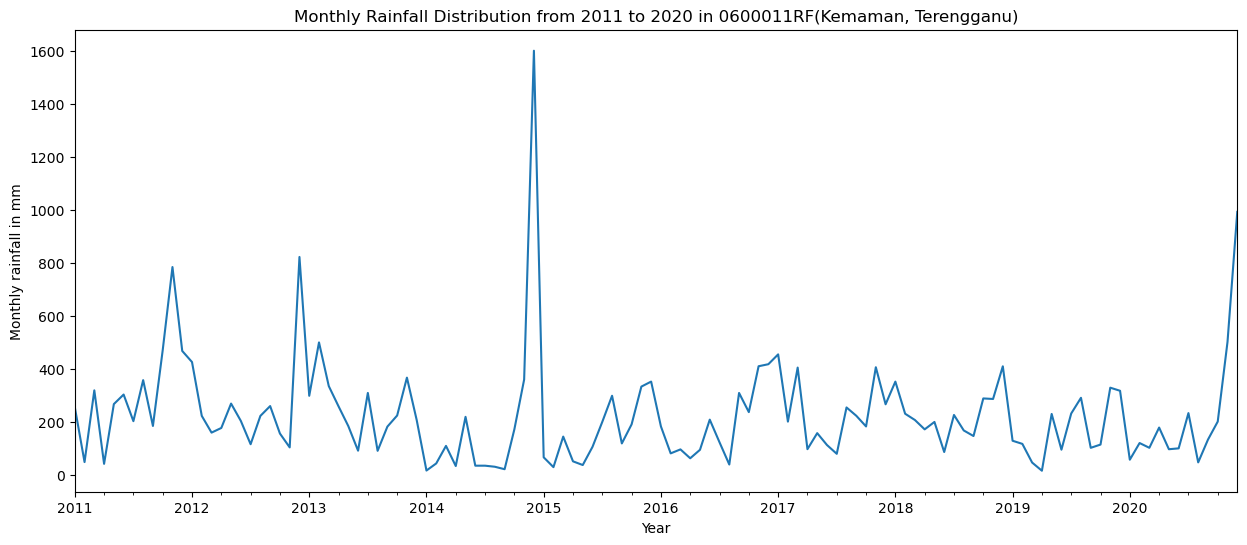

In [27]:
# rainfall by month
monthly_rain = df_kemaman['Precipitation'].resample('MS').sum()

# plot graph
monthly_rain.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.show()

In [32]:
# rolling mean 

monthly_rain_df = pd.DataFrame(monthly_rain)
monthly_rain_df['rolling_mean'] = monthly_rain_df['Precipitation'].rolling(12).mean()
monthly_rain_df['rolling_std'] = monthly_rain_df['Precipitation'].rolling(12).std()
monthly_rain_df

,Precipitation,rolling_mean,rolling_std
time_start,,,
2011-01-01,255.1,NaN,NaN
2011-02-01,47.5,NaN,NaN
2011-03-01,318.1,NaN,NaN
2011-04-01,40.8,NaN,NaN
2011-05-01,266.3,NaN,NaN
...,...,...,...
2020-08-01,46.3,148.983333,94.894983
2020-09-01,132.2,151.566667,93.892582
2020-10-01,200.3,158.800000,94.036743


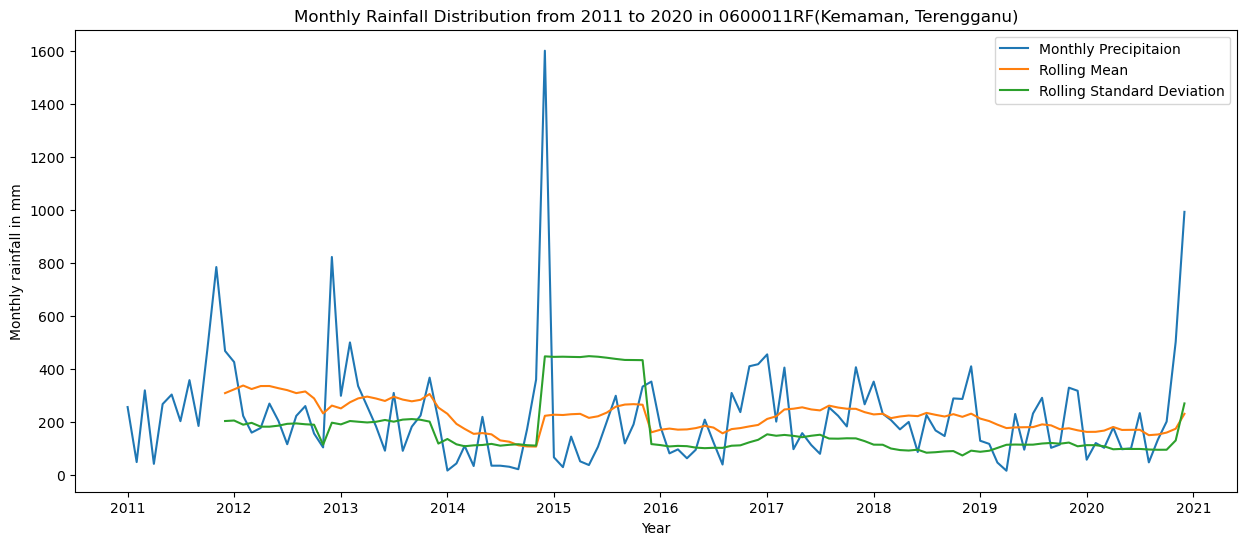

In [34]:
# check the stationary using moving average

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.plot(monthly_rain_df['Precipitation'], label = 'Monthly Precipitaion')
plt.plot(monthly_rain_df['rolling_mean'], label = 'Rolling Mean')
plt.plot(monthly_rain_df['rolling_std'], label = 'Rolling Standard Deviation')
plt.legend()
plt.show()